In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

1. id : 선수 고유의 아이디
2. name : 이름
3. age : 나이
4. continent : 선수들의 국적이 포함되어 있는 대륙입니다
5. contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다
6. position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등
7. prefer_foot : 선수가 선호하는 발입니다. ex) 오른발
8. reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
9. stat_overall : 선수의 현재 능력치 입니다.
10. stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.
11. stat_skill_moves : 선수의 개인기 능력치 입니다.
12. value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다. 1유로-> 1344.16원

In [2]:
df_train=pd.read_csv("FIFA_train.csv")
df_train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [3]:
df_test=pd.read_csv("FIFA_test.csv")
df_test

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0
...,...,...,...,...,...,...,...,...,...,...,...
3823,16924,R. Takae,20,asia,2021,MF,right,1.0,48,63,2.0
3824,16929,L. Wahlstedt,18,europe,2018,GK,right,1.0,48,65,1.0
3825,16932,Y. Góez,18,south america,2021,MF,right,1.0,48,65,2.0
3826,16937,A. Kaltner,18,europe,2020,ST,right,1.0,47,61,2.0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [5]:
df_train.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


In [6]:
df_train.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [7]:
df_train["value"]=round(df_train["value"]*1344.16/100000000,1)
df_train["contract_until"]=pd.to_datetime(df_train["contract_until"])
df_train["contract_until"]=df_train["contract_until"]-pd.to_datetime("2018")
df_train.contract_until = (pd.to_numeric(df_train['contract_until'].apply(str).str.replace('days 00:00:00', '')))

### EDA
- 상관계수 히트맵
- 변수별 그룹바이한 뒤(mean) value컬럼 확인

In [8]:
corr=df_train.drop("id",axis=1).corr().unstack().drop_duplicates()
abs(corr[corr!=1]).sort_values(ascending=False).to_frame()

0
reputation       value             0.665980
stat_overall     stat_potential    0.665453
                 value             0.658440
stat_potential   value             0.611905
reputation       stat_overall      0.521389
age              stat_overall      0.467345
stat_overall     stat_skill_moves  0.400164
reputation       stat_potential    0.399183
stat_potential   stat_skill_moves  0.332578
stat_skill_moves value             0.298507
contract_until   stat_potential    0.279125
age              reputation        0.263468
contract_until   value             0.235464
age              stat_potential    0.231303
reputation       stat_skill_moves  0.196582
contract_until   stat_overall      0.165725
age              contract_until    0.147573
contract_until   stat_skill_moves  0.093141
age              value             0.087315
contract_until   reputation        0.070828
age              stat_skill_moves  0.039362

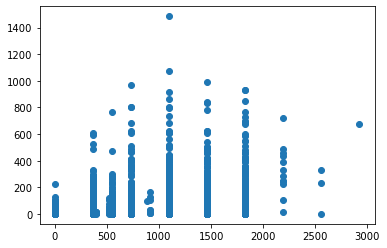

In [9]:
plt.scatter(df_train[["contract_until"]],df_train[["value"]])

In [10]:
df_train.groupby(["position","stat_skill_moves"]).mean().drop("id",axis=1).sort_values("value",ascending=False)

age  contract_until  reputation  \
position stat_skill_moves                                          
ST       5.0               24.818182     1261.272727    2.181818   
MF       5.0               28.050000     1022.500000    2.300000   
ST       4.0               25.710383      971.491803    1.562842   
MF       4.0               26.045307      949.611650    1.511327   
DF       4.0               26.130435     1111.521739    1.695652   
         3.0               26.190244      846.198374    1.201626   
ST       3.0               25.383298      832.897216    1.135974   
MF       3.0               25.305613      831.351871    1.123181   
GK       1.0               25.791667      774.145833    1.111111   
DF       2.0               25.449141      789.174640    1.087784   
MF       2.0               23.992340      783.282553    1.037447   
ST       2.0               23.389948      775.150780    1.034662   

                           stat_overall  stat_potential       value  
position stat_skill_moves                                            
ST       5.0                  78.818182       83.454545  270.163636  
MF       5.0                  79.150000       80.450000  269.170000  
ST       4.0                  75.497268       79.234973  154.690164  
MF       4.0                  75.284790       78.242718  145.874110  
DF       4.0                  76.608696       79.739130  120.321739  
         3.0                  70.775610       73.921951   47.170894  
ST       3.0                  68.974304       73.317987   42.376981  
MF       3.0                  68.848233       73.183992   40.266008  
GK       1.0                  65.188492       70.655754   26.773214  
DF       2.0                  66.213191       70.942406   25.391918  
MF       2.0                  62.676596       69.360851   13.541106  
ST       2.0                  61.771231       69.038128    9.469497

In [11]:
df_train.groupby(["position",]).mean().drop("id",axis=1).sort_values("value",ascending=False)

,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,value
position,,,,,,,
ST,24.740176,830.994135,1.154252,67.300293,72.570088,2.781818,44.764868
MF,24.938156,826.650525,1.135648,67.373104,72.371937,2.759043,41.960648
DF,25.618058,804.396274,1.117879,67.304192,71.671444,2.236833,30.973235
GK,25.791667,774.145833,1.111111,65.188492,70.655754,1.000000,26.773214


In [12]:
df_train.groupby(["contract_until",]).mean().drop("id",axis=1).sort_values("value",ascending=False)

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
contract_until,,,,,,
2922,23.000000,3.000000,85.000000,90.000000,3.000000,678.800000
2191,22.250000,1.583333,80.333333,86.083333,2.916667,329.433333
2557,19.666667,1.333333,71.000000,84.000000,3.666667,188.900000
881,31.000000,3.000000,77.000000,77.000000,4.000000,100.800000
1461,24.254928,1.244415,70.818660,76.257556,2.604468,79.291590
1826,24.934783,1.164032,69.847826,74.867589,2.559289,77.989921
911,23.000000,1.444444,69.444444,76.777778,2.777778,54.955556
545,23.065868,1.113772,68.269461,75.139721,2.626747,41.225549
1096,24.443241,1.116984,66.300260,72.033362,2.370451,38.006586


### EDA 결과
- 보통 계약기간이 많을 수록 높은 몸값을 가진다.
- 공격수> 미드필더>수비수>골키퍼 순으로 몸값이 크다
- 하지만 필드플레이어 중에 개인기(stat_skill_moves)가 낮은(2인) 선수는 골키퍼 보다 몸값이 낮다.


### 데이터 정제
- id 컬럼 삭제
- name 컬럼 인덱스로
- contract_untill 컬럼 pd.to_numeric or pd.to_datetime이용
- contract_untill 컬럼 2018 1월 1일 기준 몇일 남았는지 표기 변경
- value컬럼 유로 -> 원으로 변환 (1유로-> 1344.16원)
- value컬럼 1억원 단위로 변환

In [13]:
def preprocessing(df_train):
    df_train=df_train.drop("id",axis=1)
    df_train=df_train.set_index("name")
    df_train["contract_until"]=pd.to_datetime(df_train["contract_until"])
    df_train["contract_until"]=df_train["contract_until"]-pd.to_datetime("2018")
    df_train.contract_until = (pd.to_numeric(df_train['contract_until'].apply(str).str.replace('days 00:00:00', '')))
    le=LabelEncoder()
    lb=df_train.select_dtypes(include=object).columns
    df_train[lb]=df_train[lb].apply(le.fit_transform)
    return df_train
df_train=df_train.drop("id",axis=1)
df_train=df_train.set_index("name")
le=LabelEncoder()
lb=df_train.select_dtypes(include=object).columns
df_train[lb]=df_train[lb].apply(le.fit_transform)
df_train

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
name,,,,,,,,,,
L. Messi,31,4,1096,3,0,5.0,94,94,4.0,1485.3
De Gea,27,2,730,1,1,4.0,91,93,1.0,967.8
L. Suárez,31,4,1096,3,1,5.0,91,91,3.0,1075.3
Sergio Ramos,32,2,730,0,1,4.0,91,91,3.0,685.5
J. Oblak,25,2,1096,1,1,3.0,90,93,1.0,914.0
...,...,...,...,...,...,...,...,...,...,...
S. Adewusi,18,0,365,2,1,1.0,48,63,3.0,0.8
C. Ehlich,19,2,730,0,1,1.0,47,59,2.0,0.5
N. Fuentes,18,4,1096,0,1,1.0,47,64,2.0,0.7


In [14]:
X=df_train.drop("value",axis=1)
y=df_train.value
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10)
rf=RandomForestRegressor(random_state=10)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9882184912819758

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,rf.predict(X_test))

78.39158626482478

In [16]:
def preprocessing(df_train):
    df_train=df_train.drop("id",axis=1)
    df_train=df_train.set_index("name")
    df_train["contract_until"]=pd.to_datetime(df_train["contract_until"])
    df_train["contract_until"]=df_train["contract_until"]-pd.to_datetime("2018")
    df_train.contract_until = (pd.to_numeric(df_train['contract_until'].apply(str).str.replace('days 00:00:00', '')))
    le=LabelEncoder()
    lb=df_train.select_dtypes(include=object).columns
    df_train[lb]=df_train[lb].apply(le.fit_transform)
    return df_train
df_test=preprocessing(df_test)

In [17]:
sub=pd.read_csv("submission.csv")
sub["value"]=rf.predict(df_test)
sub

,id,value
0,1,984.662
1,2,1021.082
2,4,923.293
3,5,934.252
4,6,840.230
...,...,...
3823,16924,0.798
3824,16929,0.726
3825,16932,0.800
3826,16937,0.603


In [18]:
df_test["value"]=rf.predict(df_test)
df_test[["value"]].head(25)

,value
name,
Cristiano Ronaldo,984.662
Neymar Jr,1021.082
K. De Bruyne,923.293
E. Hazard,934.252
L. Modrić,840.230
R. Lewandowski,815.570
T. Kroos,819.188
P. Dybala,1047.306
A. Griezmann,823.155


### 파생변수
- stat_potential- stat_overall
- 위 값에 따른 유망주 판별 or 성장 가능성 yes or no (1 or 0)

In [19]:
df_train["grow"]=df_train["stat_potential"]-df_train["stat_overall"]

In [20]:
df_train

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,grow
name,,,,,,,,,,,
L. Messi,31,4,1096,3,0,5.0,94,94,4.0,1485.3,0
De Gea,27,2,730,1,1,4.0,91,93,1.0,967.8,2
L. Suárez,31,4,1096,3,1,5.0,91,91,3.0,1075.3,0
Sergio Ramos,32,2,730,0,1,4.0,91,91,3.0,685.5,0
J. Oblak,25,2,1096,1,1,3.0,90,93,1.0,914.0,3
...,...,...,...,...,...,...,...,...,...,...,...
S. Adewusi,18,0,365,2,1,1.0,48,63,3.0,0.8,15
C. Ehlich,19,2,730,0,1,1.0,47,59,2.0,0.5,12
N. Fuentes,18,4,1096,0,1,1.0,47,64,2.0,0.7,17


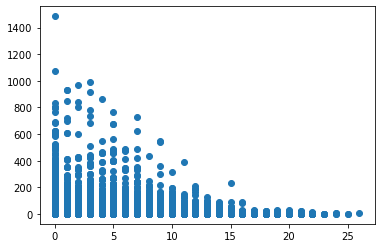

In [21]:
plt.scatter(df_train[["grow"]],df_train[["value"]])

In [22]:
X=df_train.drop("value",axis=1)
y=df_train["value"]
X_train, X_test,y_train,y_test=train_test_split(X,y,random_state=10)
rf=RandomForestRegressor(random_state=10)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9880522654586531